<a href="https://colab.research.google.com/github/swanny0000/ZTM-TensorFlow/blob/master/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifiction
* **Binary**. Simple Yes or No question  
* **Milticlass Classification**. Among 100s or 1000s of potential labels, data only gets one label.
* **Multilabel Classification**. What of all the available labels apply to our data?
<br /><br />
Here's an example of a classification network.
```
#create model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=224, 224, 3))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))
```
```
#compile model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer-tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
```
```
#fit model
model.fit(X_train, y_train, epochs=5)
```
```
#evaluate model
model.evaluate(X_test, y_test)
```
Notice that the main differences are:
> 1. Input shape is defined strictly
> 2. Different loss function
> 3. Different metrics
> 4. More focus on activation options for neurons





In [2]:
# let's get some data to fit against
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=.03, random_state=42)


In [3]:
# based on the data, we're looking at a binary classification
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [4]:
# How can we visualize this?
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


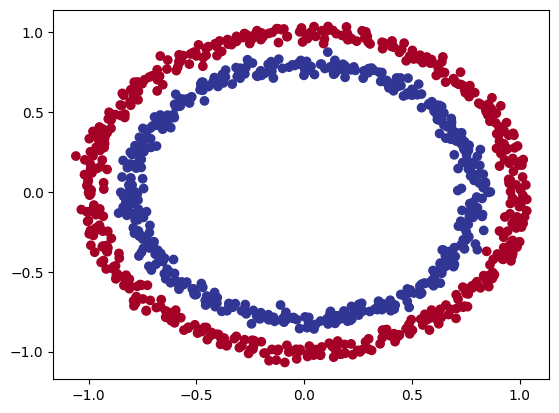

In [5]:
# what about plotting?
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

What are we trying to do?

You can also paly around with https://playground.tensorflow.org/

Let's try building a model to predict if a point is on the red or blue line!

In [6]:
X.shape, y.shape, X[0], y[0]

((1000, 2), (1000,), array([0.75424625, 0.23148074]), 1)

In [7]:
# we know the data, so let's get to modelling!
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.Input(shape=(2, )))
model_1.add(tf.keras.layers.Dense(4))
model_1.add(tf.keras.layers.Dense(1))

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_1.fit(X_train, y_train, epochs = 50, verbose=0)

model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5100


[0.6925846338272095, 0.5099999904632568]

7/7 [==============================] - 0s 3ms/step


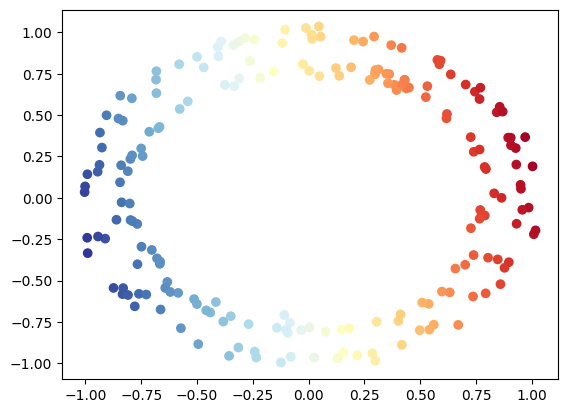

In [8]:
# what does this look like?
y_pred = model_1.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.RdYlBu)

That looks weird, and our model is essentially just guessing (accuracy = .5)

Perhaps we need to actually classify things as "inner" and "outer", not just 0 or 1!

7/7 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.7800


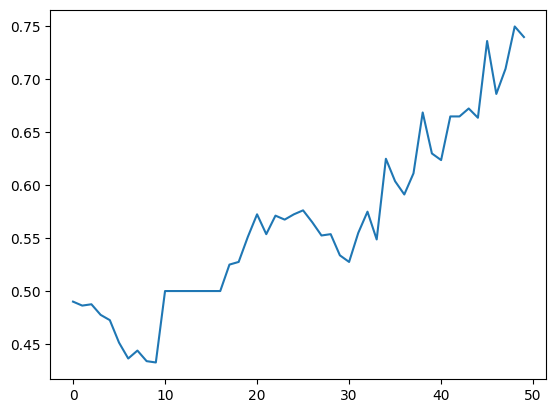

In [9]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(42)

y_one_hot = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=.2, random_state=42)

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.Input(shape=(2, )))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(2, activation="softmax"))

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model_2.fit(X_train, y_train, epochs = 50, verbose=0)

model_2.evaluate(X_test, y_test)
plt.plot(history.history["accuracy"])

7/7 [==============================] - 0s 2ms/step


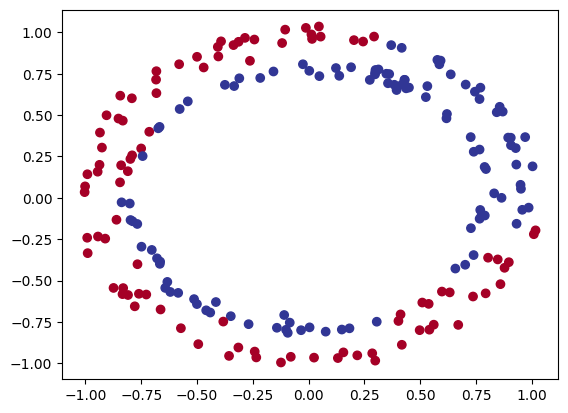

In [10]:
# what do our predictions look like?
y_pick = model_2.predict(X_test)
y_pick = y_pick.argmax(axis = 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pick, cmap=plt.cm.RdYlBu)

Let's also visualize our model's predictions by:
1. Taking in a trained model, features, and labels
2. Create a numpy meshgrid of different X values
3. make predictions across the meshgrid
4. plot the predictions and put a line between the zones

In [11]:
# based off of https://cs231n.github.io/neural-networks-case-study/
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  # define axis boundaries of the plot, create the meshgrid
  x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
  y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack our 2D arrays into single arrays

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print("Starting multi-class classification") # need to reshape prediction to prep for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Starting binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # now let's plot
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Starting binary classification


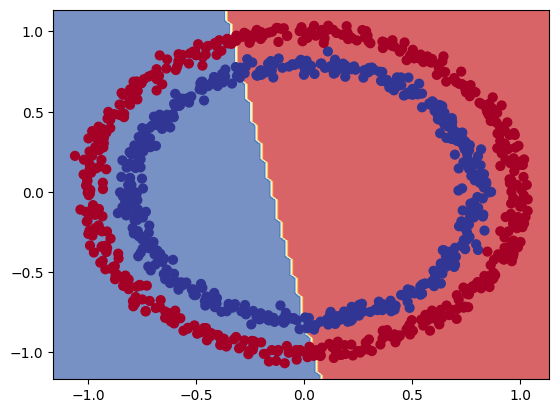

In [12]:
# let's look at our bad model...
plot_decision_boundary(model=model_1, X=X, y=y)

313/313 [==============================] - 0s 1ms/step
Starting multi-class classification


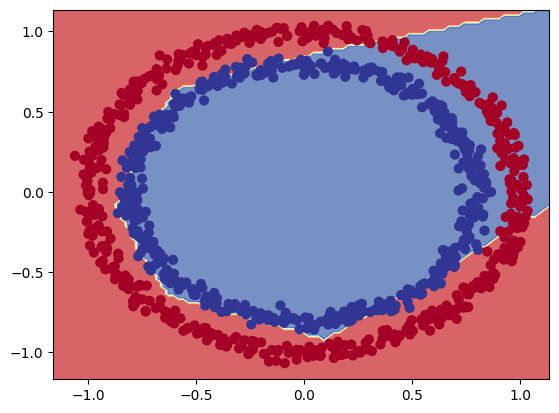

In [13]:
# what does the better model look like?
plot_decision_boundary(model=model_2, X=X, y=y)

That looks weird... not sure if that's the decision boundary's coding or if it's my problem. Let's go back to the video.

313/313 [==============================] - 0s 1ms/step
Starting binary classification


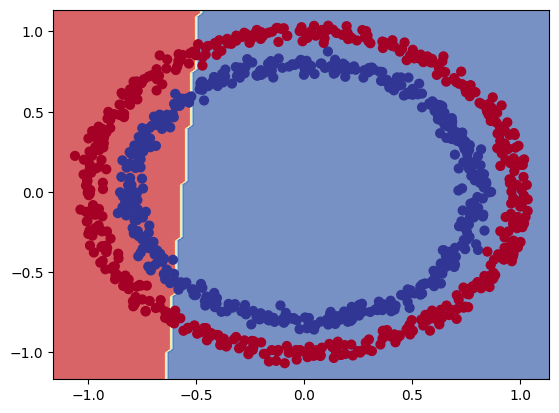

In [14]:
# can our bad model be used for a regression problem?
tf.random.set_seed(42)

# create a poor model_3
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

model_3.fit(X, y, epochs=50, verbose=0)

model_3.evaluate(X,y)
plot_decision_boundary(model=model_3, X=X, y=y)

2/2 [==============================] - 0s 11ms/step


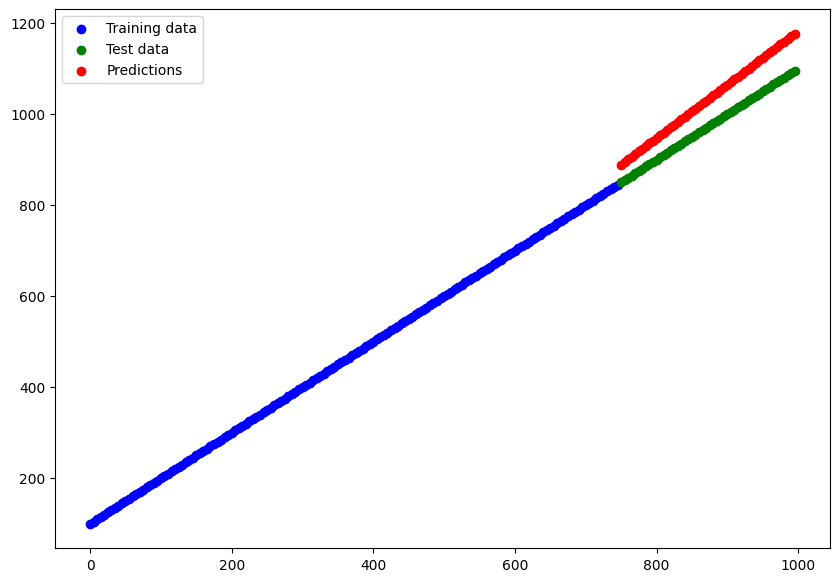

In [15]:
# can our bad model be used for a regression problem?
tf.random.set_seed(42)

# create regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# split into training and test
X_reg_train, X_reg_test, y_reg_train, y_reg_test = X_regression[:150], X_regression[150:], y_regression[:150], y_regression[150:]

# fit our model_3
''' this will throw an error because model_3's loss function is created based off of a binary classification problem!
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)
'''

tf.random.set_seed(42)
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]
                )

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

# visualize!
y_reg_preds = model_3.predict(X_reg_test)
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

So our model is learning *something*, but it's not good enough to fit our classification model. We haven't introduced nonlinearity yet!
## Nonlinearity

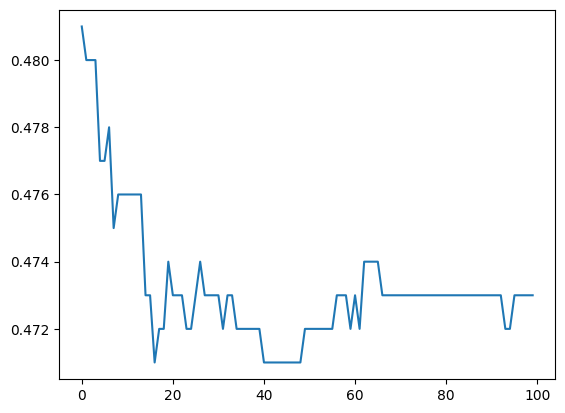

In [16]:
# what does linearity give us
tf.random.set_seed(42)

model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.linear))

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=["accuracy"])

history_4 = model_4.fit(X, y, epochs=100, verbose=0)

plt.plot(history_4.history["accuracy"])

313/313 [==============================] - 0s 1ms/step
Starting binary classification


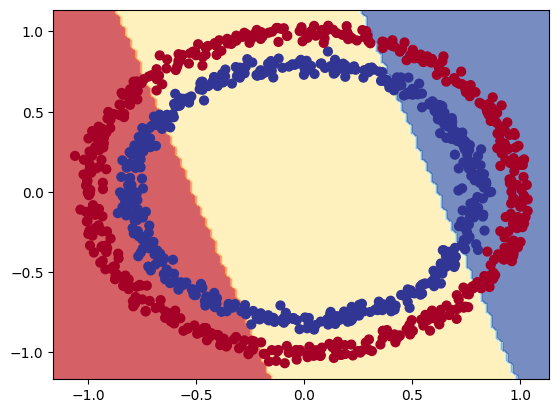

In [17]:
plot_decision_boundary(model=model_4, X=X, y=y)

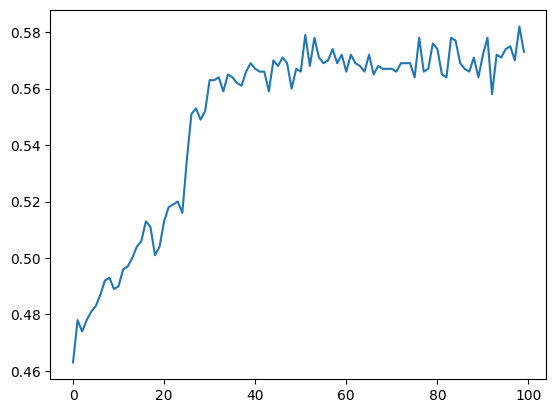

In [18]:
# let's go non-linear!
tf.random.set_seed(42)

model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Dense(5, activation=tf.keras.activations.relu))
model_5.add(tf.keras.layers.Dense(5, activation=tf.keras.activations.tanh))
model_5.add(tf.keras.layers.Dense(1))

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=["accuracy"])

history_5 = model_5.fit(X, y, epochs=100, verbose=0)

plt.plot(history_5.history["accuracy"])

313/313 [==============================] - 0s 1ms/step
Starting binary classification


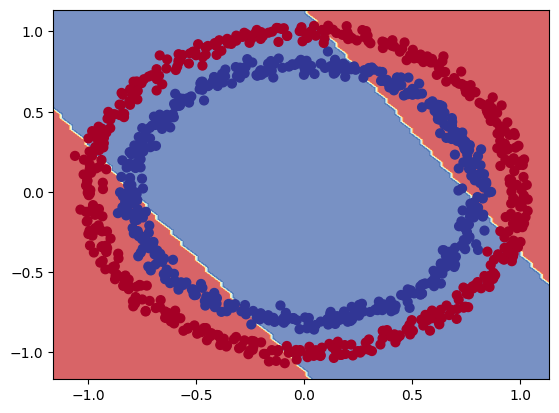

In [19]:
plot_decision_boundary(model=model_5, X=X, y=y)

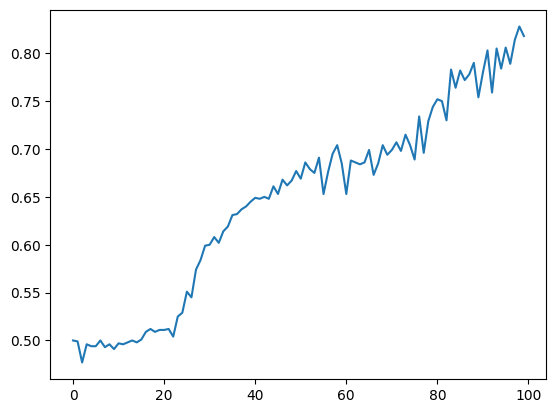

In [20]:
# what's up with relu-only?
tf.random.set_seed(42)

model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Dense(5, activation=tf.keras.activations.relu))
model_6.add(tf.keras.layers.Dense(5, activation=tf.keras.activations.relu))
model_6.add(tf.keras.layers.Dense(1))

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=["accuracy"])

history_6 = model_6.fit(X, y, epochs=100, verbose=0)

plt.plot(history_6.history["accuracy"])

313/313 [==============================] - 0s 1ms/step
Starting binary classification


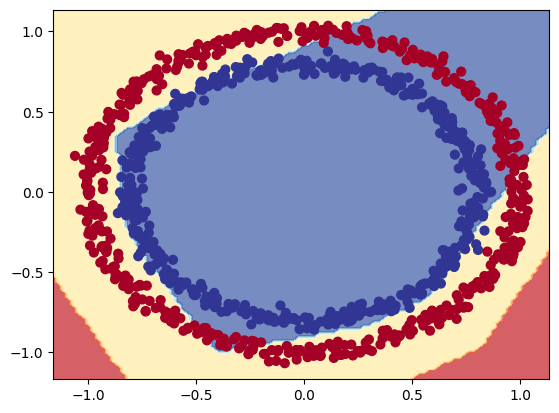

In [21]:
plot_decision_boundary(model=model_6, X=X, y=y)

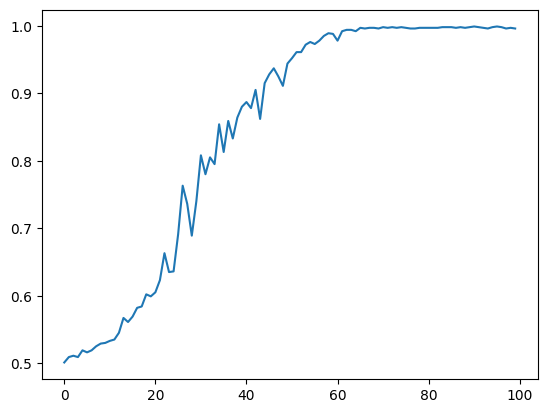

In [22]:
# relu may need some activation on it's final layer, too...
tf.random.set_seed(42)

model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Dense(5, activation=tf.keras.activations.relu))
model_7.add(tf.keras.layers.Dense(5, activation=tf.keras.activations.relu))
model_7.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid))

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=["accuracy"])

history_7 = model_7.fit(X, y, epochs=100, verbose=0)

plt.plot(history_7.history["accuracy"])

313/313 [==============================] - 0s 1ms/step
Starting binary classification


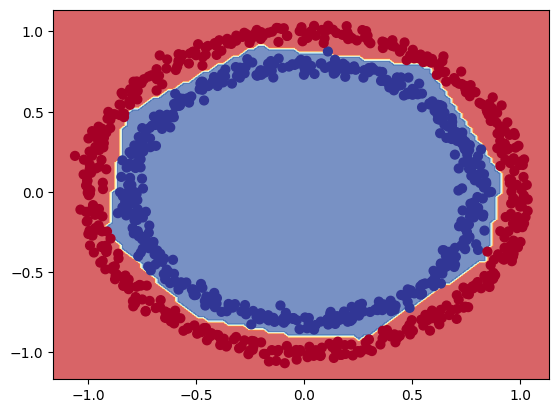

In [23]:
plot_decision_boundary(model=model_7, X=X, y=y)

Remember - binary classification problems should have a sigmoid activation function on it's output neurons.

https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

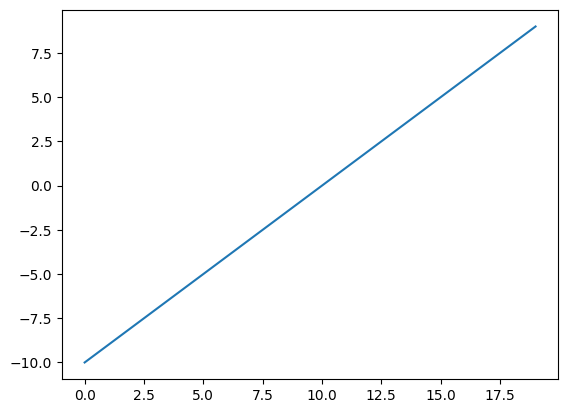

In [24]:
# let's see linear and non-linear functions in action
A = tf.cast(tf.range(-10, 10), tf.float32)
plt.plot(A)

(-2.0, 2.0)

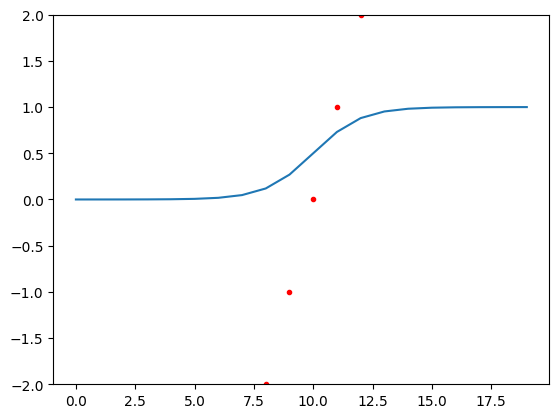

In [25]:
# what does a sigmoid look like?
plt.plot(tf.math.sigmoid(A))
plt.plot(A, 'r.')
plt.ylim(-2, 2)

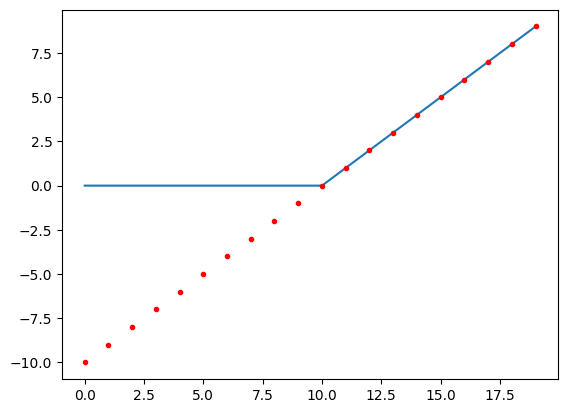

In [26]:
# how about relu?
plt.plot(tf.keras.activations.relu(A))
plt.plot(A, 'r.')

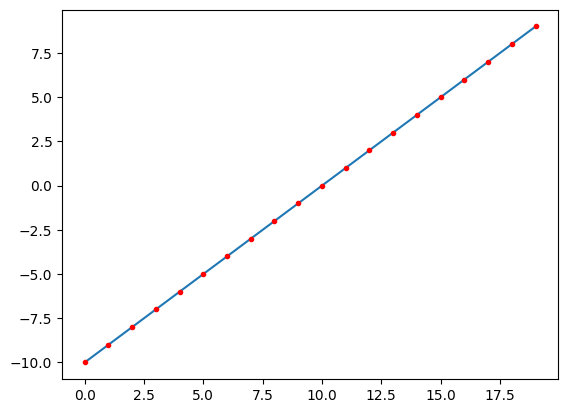

In [27]:
# how about linear? it's just unmodified!
plt.plot(tf.keras.activations.linear(A))
plt.plot(A, 'r.')

For more info on activation functions, you can also check out https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#

## Evaluating and predicting Classification Models

In [32]:
# let's recreate our training and test set (remember there's also validation set, like the model's practice exam)
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise=.03, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

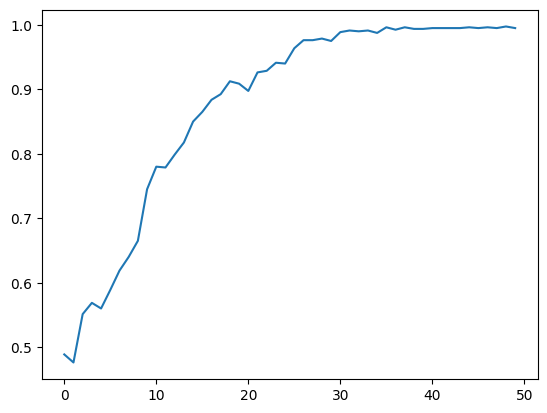

In [50]:
# let's make a new model
import tensorflow as tf
import matplotlib.pyplot as plt

model_8 = tf.keras.Sequential()
model_8.add(tf.keras.layers.Dense(4, activation=tf.keras.activations.relu))
model_8.add(tf.keras.layers.Dense(4, activation=tf.keras.activations.relu))
model_8.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid))

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                metrics=["accuracy"])

history_8 = model_8.fit(X_train, y_train, epochs=50, verbose=0)

plt.plot(history_8.history["accuracy"])

In [51]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9650


[0.09893066436052322, 0.9649999737739563]

313/313 [==============================] - 0s 1ms/step
Starting binary classification
313/313 [==============================] - 0s 1ms/step
Starting binary classification


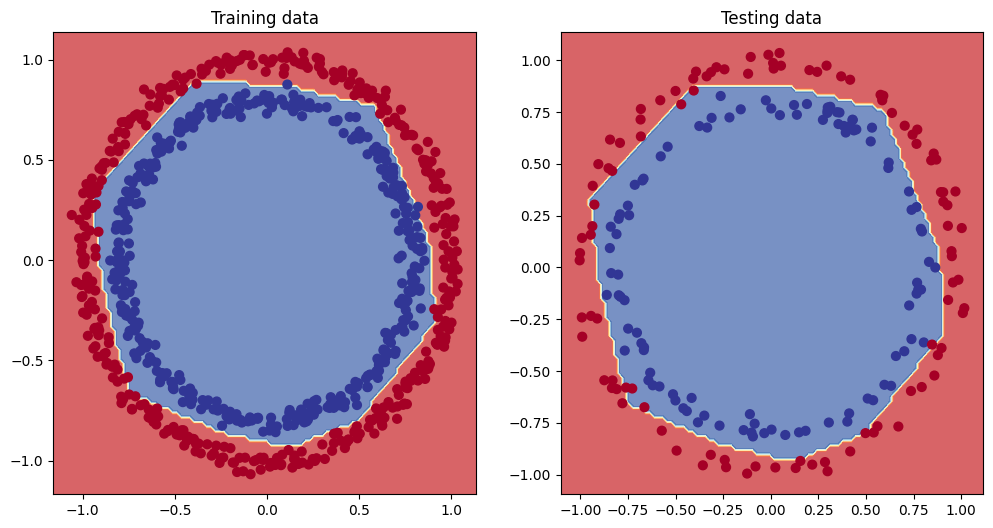

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_8, X=X_test, y=y_test)

Something to think about... how can we find the ideal learning rate for our model?

First, let's take a look at the history data in more depth.

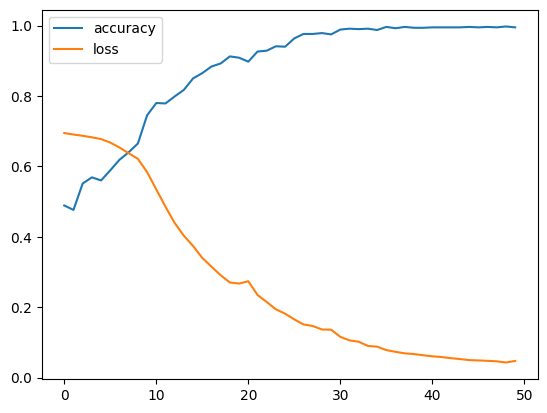

In [53]:
plt.plot(history_8.history["accuracy"], label="accuracy")
plt.plot(history_8.history["loss"], label="loss")
plt.legend()

In general, decreasing a loss function means that our model is improving. Let's see how we can use these loss curves to identify the ideal learning rate!

## Finding the Best Learning Rate
We should find the learning rate where the loss decreases the most during training. We'll need:
* A learning rate **callback** is an extra piece of funcitonality we can add to our model as we're training!
* Another model (b/c why not)
* A modified loss curve plot to compare loss vs the learning rate. This was we can identify the model with the highest loss based on learning rate.

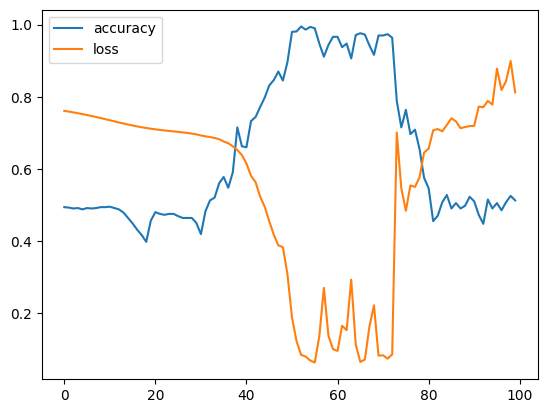

In [59]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential()
model_9.add(tf.keras.layers.Dense(4, activation="relu"))
model_9.add(tf.keras.layers.Dense(4, activation="relu"))
model_9.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

#let's create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0)

plt.plot(history_9.history["accuracy"], label="accuracy")
plt.plot(history_9.history["loss"], label="loss")
plt.legend()

As epochs go on, we increase the learning rate... so as the epochs go on we start jumping all over the place!

Text(0, 0.5, 'Loss')

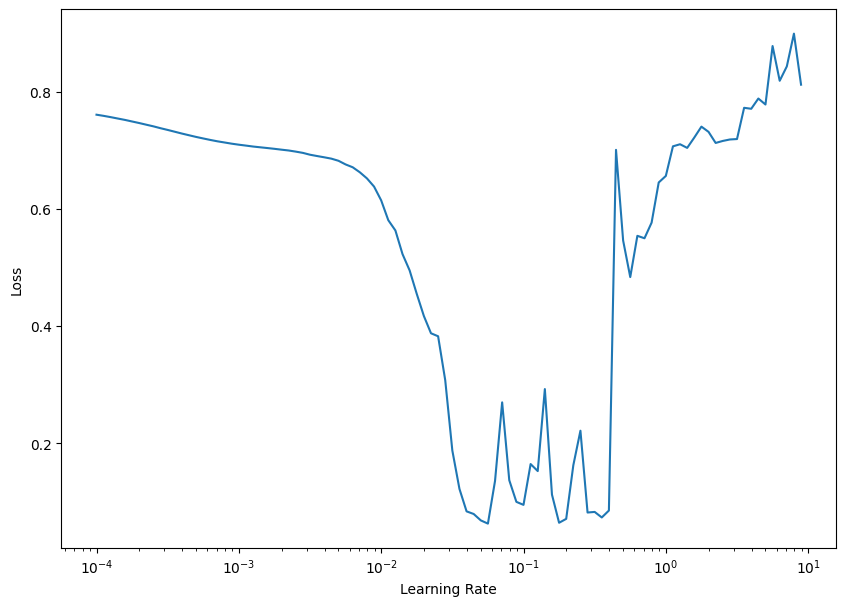

In [62]:
# what would the learning rate vs loss curve look like?
lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

To figure out the ideal learning rate to start training our model, we typically want to grab the learning rate where the loss is still decreasing, but hasn't quite flattened out.

Usually, about 10x smaller than the bottom of the curve - for us, around .01 - .03
<br><br>
You can also just guess at learning rates around 1, .1, .01, .001, or .0001 If those or the default learning rates for our optimizers don't work, then we can fall back to identifying a custom learning rate!

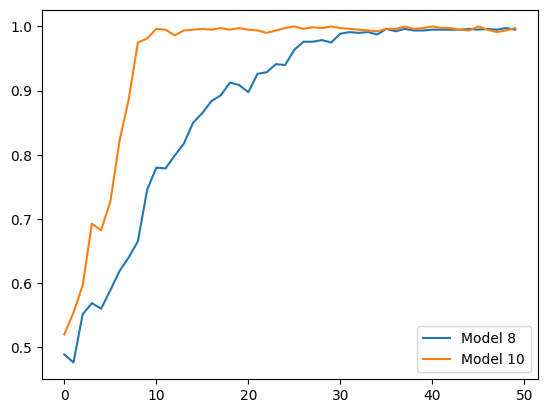

In [66]:
# let's use a learning rate of .02 and compare it to model_8, which had a learning rate of .01
tf.random.set_seed(42)

model_10 = tf.keras.Sequential()
model_10.add(tf.keras.layers.Dense(4, activation="relu"))
model_10.add(tf.keras.layers.Dense(4, activation="relu"))
model_10.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train, y_train, epochs=50, verbose=0)

plt.plot(history_8.history["accuracy"], label="Model 8")
plt.plot(history_10.history["accuracy"], label="Model 10")
plt.legend()

In [67]:
model_8.evaluate(X_test, y_test)
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0700 - accuracy: 0.9800


[0.07002005726099014, 0.9800000190734863]

note that just because a model trains faster doesn't necessarily mean that it's more accurate. A larger learning rate may bounce around a local minimum that a smaller learning rate can get right.

## Other Classification and Evaluation Methods
* **Accuracy**: default metrics, not the best for impalanced classes (e.g. one class has 10 examples, another class has 200 examples
* **Precision**: Higher precision leads to fewer false positives.
* **Recall**: Higher recall leads to fewer false *negatives*.

>>Note that there's often a tradeoff between precision and recall - you can't typically increase both beyond a certain point.

* **F1 Score**: Combination between precision and recall, usually a good overall metric for a classification model
* **Confusion Matrix**: Gives a table of all right/wrong picks for each class, which can help identify gaps or issues in a model. Can be challenging to use with larger numbers of classes.

Scikit Learn also has a classification_report we can use!

In [71]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss:.6f}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 6ms/step - loss: 0.0700 - accuracy: 0.9800
Model loss on test set: 0.070020
Model accuracy on test set: 98.00%


In [76]:
# how can we build a confusion matrix?
from sklearn.metrics import confusion_matrix
y_preds_10 = model_10.predict(X_test)
# but y_preds are going to be floats, not 0 or 1
y_preds_10 = tf.round(y_preds_10)
confusion_matrix(y_test, y_preds_10)

7/7 [==============================] - 0s 2ms/step


array([[ 96,   4],
       [  0, 100]])

We got 96 correct negatives, 100 correct positives, and 4 false positives. Can we make it prettier?

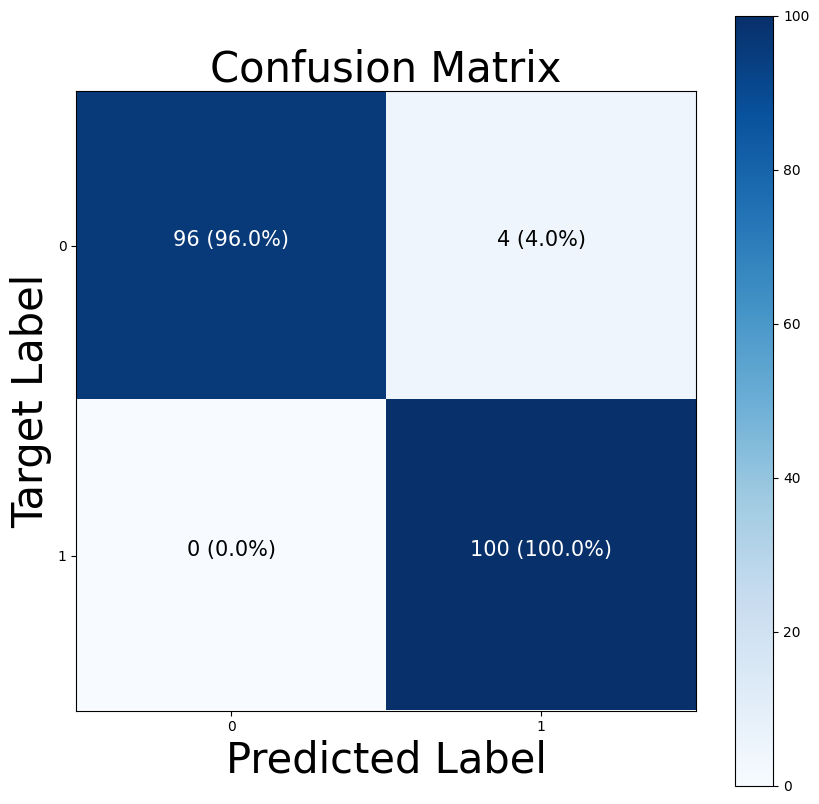

In [164]:
# scikit learn can print it prettily, but we're using tensorflow, so we need to rewrite a bit of code
import itertools
def print_confusion_matrix(test_vals, pred_vals, classes=None, figsize=(10, 10), textsize=15):
  matrix = confusion_matrix(test_vals, pred_vals)
  cm_norm = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis] # normalize the matrix
  n_classes = matrix.shape[0]

  # make it prettier
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(matrix, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # create some classes
  if classes:
    labels = classes
  else:
    labels = np.arange(matrix.shape[0])

  # label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="Target Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  ax.xaxis.label.set_size(textsize*2)
  ax.yaxis.label.set_size(textsize*2)
  ax.title.set_size(textsize*2)

  # Set threshold for different colors
  threshold = (matrix.max() + matrix.min()) / 2

  # Plot text in each cell
  for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, f"{matrix[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if matrix[i, j] > threshold else "black",
             size=textsize)


print_confusion_matrix(y_test, y_preds_10)

# Multiclass Classification!!
For practice, we'll build a neural network to classify pictures of items of clothing from [Tensorflow's fashion_mnist dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist)

In [84]:
# let's get some data
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# typically in tensorflow datasets, we already have train and test data split out
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [86]:
# what does the training data look like?
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [87]:
# what's the shape of an example?
train_data[0].shape, train_labels[0].shape

((28, 28), ())

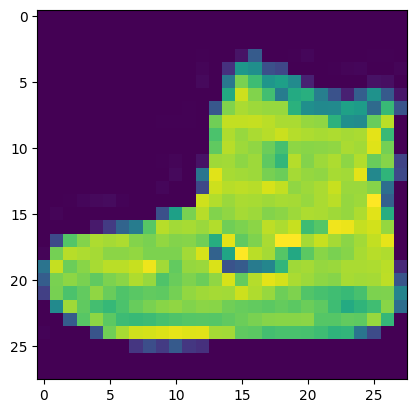

In [88]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

Let's build out a list of the output values, based on the labels from [Know Your Data](https://knowyourdata-tfds.withgoogle.com/#dataset=fashion_mnist&tab=STATS&group_by=default_segment.fashion_mnist.label.value&select=default_segment.fashion_mnist.label.value)

In [162]:
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress", "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle Boot"]

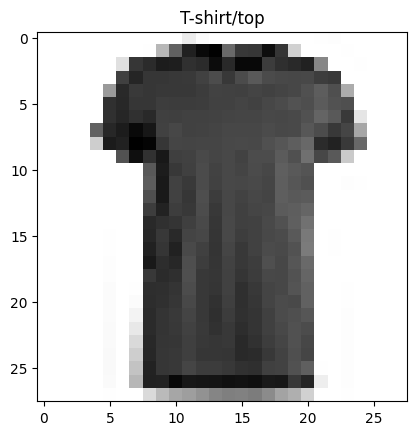

In [95]:
def plot_image(train_data, train_labels, index):
  plt.imshow(train_data[index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[index]])

plot_image(train_data, train_labels, 17)

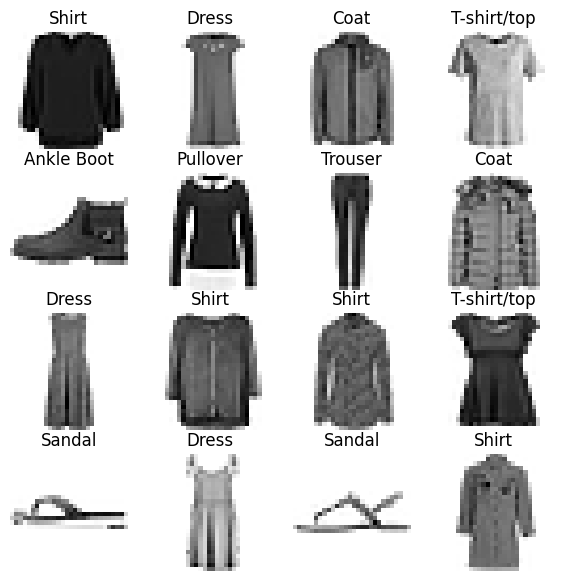

In [103]:
# let's plot some more random examples
import random
plt.figure(figsize=(7, 7))
for i in range(16):
  ax = plt.subplot(4, 4, i+1)
  rand_index = random.choice(range(len(train_data)))
  plot_image(train_data, train_labels, rand_index)
  ax.axis("off")

Why do we want to look at values? Types of questions to ask...
* Do these images have many straight lines?
* Do these images have curves?
* What kinds of model hyperparameters will we want to use?

We'll need to tweak a few things:
1. Input Shape: 28x28 (the shape of one image)
2. Output Shape: 10 (one per class ouf labels)
3. Loss Function: tf.keras.losses.CategoricalCrossentropy()
  * Note that this is for one-hot-encoded labels. If you have a scalar (number) as your labels, use SparseCategoricalCrossentropy instead
4. Output Layer Activation: softmax instead of sigmoid

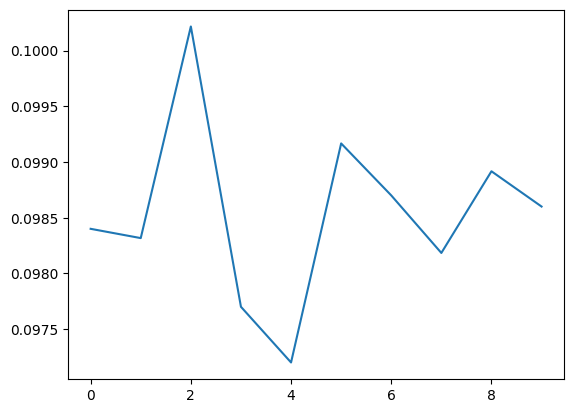

In [110]:
# let's get to building out multi-class classification!
model_11 = tf.keras.Sequential()
model_11.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # input data needs to be in one long vector
model_11.add(tf.keras.layers.Dense(4, activation="relu"))
model_11.add(tf.keras.layers.Dense(4, activation="relu"))
# output layer needs to have the number of classes we're trying to match to, and uses softmax
model_11.add(tf.keras.layers.Dense(10, activation="softmax"))

#loss function is SparseCategoricalCrossEntropy, since we're not one-hot encoded
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])

history_11 = model_11.fit(train_data,
                          train_labels,
                          epochs=10,
                          verbose=0,
                          validation_data=(test_data, test_labels))

plt.plot(history_11.history["accuracy"], label="accuracy")

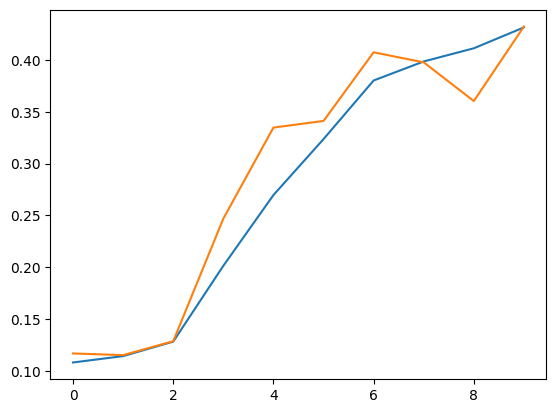

In [131]:
# a better approach is to one-hot encode everything
train_labels_one_hot = tf.one_hot(train_labels, depth=10)
test_labels_one_hot = tf.one_hot(test_labels, depth=10)

# rebuild out model
tf.random.set_seed(42)

model_11 = tf.keras.Sequential()
model_11.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # input data needs to be in one long vector
model_11.add(tf.keras.layers.Dense(4, activation="relu"))
model_11.add(tf.keras.layers.Dense(4, activation="relu"))
# output layer needs to have the number of classes we're trying to match to, and uses softmax
model_11.add(tf.keras.layers.Dense(10, activation="softmax"))

#loss function is CategoricalCrossEntropy
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])

history_11 = model_11.fit(train_data,
                          train_labels_one_hot,
                          epochs=10,
                          verbose=0,
                          validation_data=(test_data, test_labels_one_hot))

plt.plot(history_11.history["accuracy"], label="accuracy")
plt.plot(history_11.history["val_accuracy"], label="Validation accuracy")

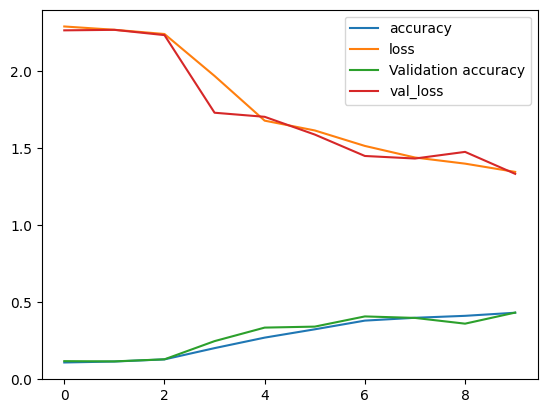

In [132]:
plt.plot(history_11.history["accuracy"], label="accuracy")
plt.plot(history_11.history["loss"], label="loss")
plt.plot(history_11.history["val_accuracy"], label="Validation accuracy")
plt.plot(history_11.history["val_loss"], label="val_loss")
plt.legend()

In [133]:
model_11.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_124 (Dense)           (None, 4)                 3140      
                                                                 
 dense_125 (Dense)           (None, 4)                 20        
                                                                 
 dense_126 (Dense)           (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


but wait! did we scale everything?

In [134]:
train_data.min(), train_data.max()

(0, 255)

In [135]:
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.
train_data_norm.dtype, test_data_norm.dtype, train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(dtype('float64'), dtype('float64'), 0.0, 1.0, 0.0, 1.0)

In [136]:
# let's do it again. Normalized data, one-hot-encoded labels
tf.random.set_seed(42)

model_12 = tf.keras.Sequential()
model_12.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_12.add(tf.keras.layers.Dense(4, activation="relu"))
model_12.add(tf.keras.layers.Dense(4, activation="relu"))
model_12.add(tf.keras.layers.Dense(10, activation="softmax"))

model_12.compile(loss=tf.keras.losses.CategoricalFocalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])

history_12 = model_12.fit(train_data_norm,
                          train_labels_one_hot,
                          epochs=10,
                          validation_data=(test_data_norm, test_labels_one_hot))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1696 - accuracy: 0.6416 - val_loss: 0.1104 - val_accuracy: 0.7529
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0962 - accuracy: 0.7612 - val_loss: 0.0948 - val_accuracy: 0.7612
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0853 - accuracy: 0.7716 - val_loss: 0.0906 - val_accuracy: 0.7517
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0801 - accuracy: 0.7794 - val_loss: 0.0857 - val_accuracy: 0.7689
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0770 - accuracy: 0.7844 - val_loss: 0.0837 - val_accuracy: 0.7797
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0745 - accuracy: 0.7890 - val_loss: 0.0823 - val_accuracy: 0.7760
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.7930 - val_loss: 0.0779 - val_accuracy:

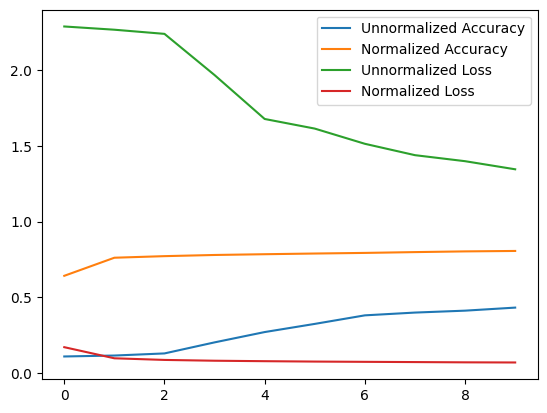

In [138]:
# what's the impact of normalized inputs?
plt.plot(history_11.history["accuracy"], label="Unnormalized Accuracy")
plt.plot(history_12.history["accuracy"], label="Normalized Accuracy")
plt.plot(history_11.history["loss"], label="Unnormalized Loss")
plt.plot(history_12.history["loss"], label="Normalized Loss")
plt.legend()

Notice that the same model with even slightly different inputs can produce *drastically* different results. **ALWAYS** visualize the impact of *every* individual change you make.

## Finding the Ideal Learning Rate
Let's try to find our ideal neural network training rate.

In [140]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential()
model_13.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_13.add(tf.keras.layers.Dense(4, activation="relu"))
model_13.add(tf.keras.layers.Dense(4, activation="relu"))
model_13.add(tf.keras.layers.Dense(10, activation="softmax"))

model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])

#add in a callback to increase the learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_13 = model_13.fit(train_data_norm,
                          train_labels_one_hot,
                          epochs=40,
                          validation_data=(test_data_norm, test_labels_one_hot),
                          callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 2ms/step - loss: 1.2199 - accuracy: 0.5758 - val_loss: 0.8739 - val_accuracy: 0.6910 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7526 - accuracy: 0.7427 - val_loss: 0.7224 - val_accuracy: 0.7567 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6668 - accuracy: 0.7697 - val_loss: 0.6830 - val_accuracy: 0.7680 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6398 - accuracy: 0.7780 - val_loss: 0.6653 - val_accuracy: 0.7717 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6240 - accuracy: 0.7831 - val_loss: 0.6509 - val_accuracy: 0.7719 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6126 - accuracy: 0.7893 - val_loss: 0.6685 - val_accuracy: 0.7708 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Learning Rate vs Loss for Model 13')

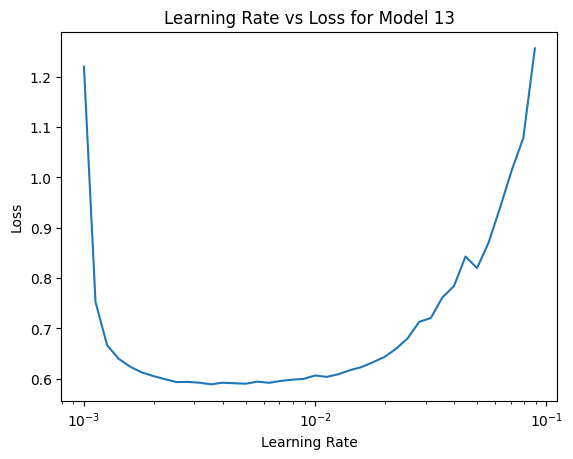

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_13.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss for Model 13")

Lowest point on the curve looks to be around 3*10^-3 - let's refit our model

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0571 - accuracy: 0.6014 - val_loss: 0.8455 - val_accuracy: 0.6957
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7894 - accuracy: 0.7123 - val_loss: 0.8114 - val_accuracy: 0.7207
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7478 - accuracy: 0.7277 - val_loss: 0.7606 - val_accuracy: 0.7211
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7316 - accuracy: 0.7327 - val_loss: 0.7489 - val_accuracy: 0.7274
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7229 - accuracy: 0.7358 - val_loss: 0.7623 - val_accuracy: 0.7304
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7155 - accuracy: 0.7369 - val_loss: 0.7826 - val_accuracy: 0.7240
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7144 - accuracy: 0.7383 - val_loss: 0.7480 - val_accuracy:

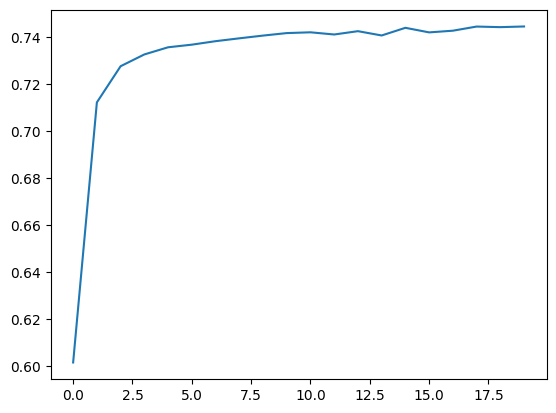

In [142]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential()
model_14.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_14.add(tf.keras.layers.Dense(4, activation="relu"))
model_14.add(tf.keras.layers.Dense(4, activation="relu"))
model_14.add(tf.keras.layers.Dense(10, activation="softmax"))

model_14.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=.003),
                 metrics=["accuracy"])

history_14 = model_14.fit(train_data_norm,
                          train_labels_one_hot,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels_one_hot))

plt.plot(history_14.history["accuracy"])

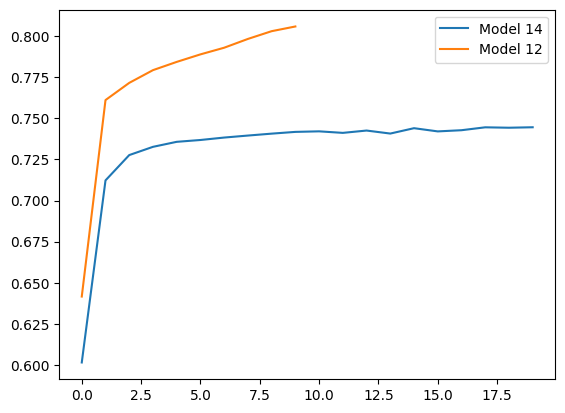

In [143]:
# what's 14 vs 12?
plt.plot(history_14.history["accuracy"], label="Model 14")
plt.plot(history_12.history["accuracy"], label="Model 12")
plt.legend()

Looks like .001 is actually better than .003 - remember to go a tad *less than* where the lowest point on the loss curve is


What does the confusion matrix for model 12 look like?

313/313 [==============================] - 0s 1ms/step


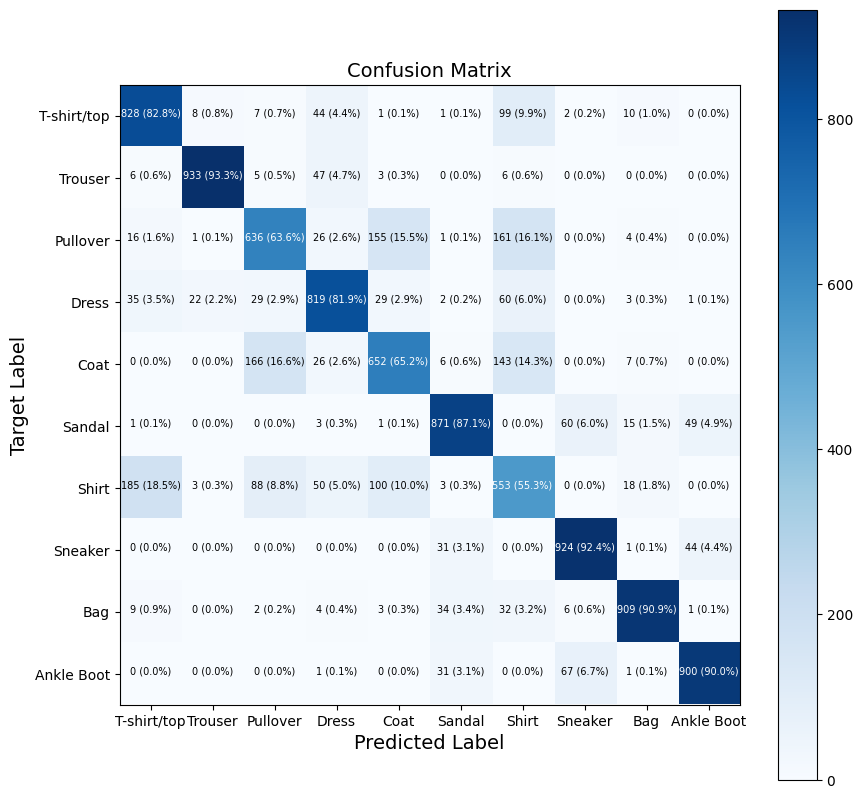

In [165]:
model_12_preds = model_12.predict(test_data_norm)
model_12_preds = tf.argmax(model_12_preds, axis=1)
print_confusion_matrix(test_labels, model_12_preds, classes=class_names, textsize=7)

Let's also assess some predictions through visualization!

Let's create a function that:
* Plots a random image
* Make a prediction of that image
* Display the label and prediction for that image

In [177]:
import random

def plot_random_image(model, images, labels, classes, figsize=(5, 5)):
  '''
  Picks a random image, displays it, and displays a prediction and label
  '''
  i = random.randint(0, len(images))

  # create prediction and get true label
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[labels[i]]

  # show the image
  plt.figure(figsize=figsize)
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change color of title depending on outcome
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  #add plot information
  plt.xlabel("Prediction: {} {:2.0f}%\n(True: {})".format(pred_label,
                                                         100*tf.reduce_max(pred_probs),
                                                         true_label),
             color=color)

1/1 [==============================] - 0s 28ms/step


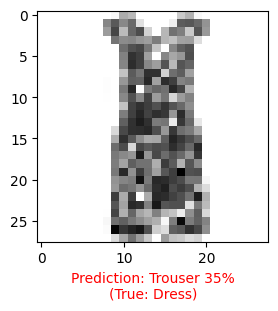

In [179]:
plot_random_image(model_14, test_data_norm, test_labels, class_names, figsize=(3, 3))

## What patterns is our model actually learning?

In [180]:
# let's look at the layers of our model
model_14.layers

In [184]:
# what's in each layer?
weights_1, biases_1 = model_14.layers[1].get_weights()
weights_1, weights_1.shape, biases_1.shape

(array([[-0.02443772, -1.9924915 , -1.3755524 ,  0.08657292],
        [-0.03784131, -0.96521276, -0.613724  , -0.05510108],
        [-0.04098929, -2.5672941 ,  2.554961  ,  0.00864439],
        ...,
        [-0.03741372, -0.49244913, -0.097206  ,  0.07381079],
        [-0.05896689, -0.4893738 , -0.31320775, -0.08492643],
        [ 0.05784175, -1.4733047 ,  0.9286556 ,  0.06768481]],
       dtype=float32),
 (784, 4),
 (4,))

for each datapoint in our input layer, we have 784 weights (28*28) and 4 biases (since we have 4 neurons in this layer. Test second layer is different!

In [185]:
weights_2, biases_2 = model_14.layers[2].get_weights()
weights_2, weights_2.shape, biases_2.shape

(array([[-0.5210101 , -0.85235476,  0.45217928, -0.26618406],
        [ 0.59403473,  0.18175922, -0.11682899,  0.73739356],
        [-1.1727915 , -0.642195  ,  0.5539516 ,  0.00305215],
        [ 0.34093437, -0.42506623, -0.2073114 , -0.78849506]],
       dtype=float32),
 (4, 4),
 (4,))